In [28]:
import json
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


import pandas as pd
from PIL import Image
import torch
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

import time
import matplotlib.pyplot as plt
# import logging
from datetime import datetime
import torch.nn as nn



from matplotlib.colors import LinearSegmentedColormap
import os
import zipfile

In [15]:
import os

def list_files_in_directory(directory):
    """
    Функция, которая возвращает список названий файлов в указанной папке.

    Параметры:
     - directory: Строка, путь к папке, в которой нужно найти файлы.
     
    Возвращает:
     - Список строк с названиями файлов.
    """
    file_list = []
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            file_list.append(filename)
    return file_list

# Пример использования
directory_path = 'dataset_1_geometry'  # Замените на свой путь к папке
files = list_files_in_directory(directory_path)
print("Список файлов в папке:", files)

Список файлов в папке: ['dataset_0.json', 'dataset_1.json', 'dataset_10.json', 'dataset_11.json', 'dataset_12.json', 'dataset_13.json', 'dataset_14.json', 'dataset_15.json', 'dataset_16.json', 'dataset_17.json', 'dataset_18.json', 'dataset_19.json', 'dataset_2.json', 'dataset_20.json', 'dataset_21.json', 'dataset_22.json', 'dataset_23.json', 'dataset_24.json', 'dataset_25.json', 'dataset_26.json', 'dataset_27.json', 'dataset_28.json', 'dataset_29.json', 'dataset_3.json', 'dataset_30.json', 'dataset_31.json', 'dataset_32.json', 'dataset_4.json', 'dataset_5.json', 'dataset_6.json', 'dataset_7.json', 'dataset_8.json', 'dataset_9.json']


In [16]:
dataset = []
for nameoffile in files:
    name = 'dataset_1_geometry/'+nameoffile
    with open(name, 'r') as file:
        data = json.load(file)

    # Создание датасета
    
    for item in data:
        input_values = item['input']
        output_value = item['output'][0]
        dataset.append(input_values + [output_value])

# Преобразование в numpy массив
dataset = np.array(dataset)


In [17]:
print(len(dataset))

34500


In [45]:
X = dataset[:, :-1]
y = dataset[:, -1]
# Предварительно обработаем X, чтобы избежать бесконечных значений после логарифмического преобразования
X_processed = np.where(X <= 0, 1e-10, X)  # Заменяем нулевые значения на небольшое положительное число

# Применяем логарифмическое преобразование к данным
X_log = np.log(X_processed)

# Создаем модель полиномиальной регрессии
degree = 7  # Можно выбрать другую степень полинома
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Обучаем модель
model.fit(X_log, y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

In [27]:
new_data = np.array([[-1.0, 0.0, 0.0005879507104204, 1.0, 0.004975124378109453, 1.0, 0.011695906432748537]])
new_data_processed = np.where(new_data <= 0, 1e-10, new_data)  # Заменяем нулевые значения на небольшое положительное число
new_data_log = np.log(new_data_processed)
predicted_value = model.predict(new_data_log)[0]
print("Predicted value:", predicted_value)

# Обратное преобразование предсказанного числа
predicted_value_inv = np.exp(predicted_value) - 1
print("Inverse transformed predicted value:", predicted_value_inv)

Predicted value: 0.0002240897190404212
Inverse transformed predicted value: 0.0002241148290171857


In [29]:
def max_width_spinneret(matrix_array):
    
    # Находим индексы элементов, не равных -1, для каждой строки 
    non_negative_indices = (matrix_array != -1)                          
                                                                            
    # Считаем количество элементов, не равных -1, для каждой строки      
    count_non_negative_elements = np.sum(non_negative_indices, axis=1)   
                                                                            
    # Находим индекс строки с максимальным количеством элементов, не равных -1
    max_row_index = np.argmax(count_non_negative_elements)
    max_width = count_non_negative_elements[max_row_index]
    
    return max_width

def heigh_of_col(mrx, index):
    column = mrx[:, index]
    mask = column != -1
    count_non_negative = np.sum(mask)
    return count_non_negative

def width_row(matrix_array, row):
    # Находим индексы элементов, не равных -1, в выбранной строке
    non_negative_indices_in_selected_row = (matrix_array[row] != -1)

    # Считаем количество элементов, не равных -1, в выбранной строке
    count_non_negative_elements_in_selected_row = np.sum(non_negative_indices_in_selected_row)
    
    return count_non_negative_elements_in_selected_row

def length_to_elements(matrix_array, row, column):
    selected_row_part = matrix_array[row, :column + 1]
    non_negative_indices_in_selected_row_part = (selected_row_part != -1)
    count_non_negative_elements_in_selected_row_part = np.sum(non_negative_indices_in_selected_row_part)
    
    return count_non_negative_elements_in_selected_row_part

def create_pandas_file(output_file: str):
    return pd.read_csv(output_file)

def create_matrices(columns, idx, pandas_file, step_x, step_y, matrixes):
      
    for col in columns[idx][2:3]:
        print(col)
        matrix = pd.pivot_table(pandas_file, values=col,
                                index='y',
                                columns='x',
                                fill_value=-1)
        print(matrix)
        matrixes.append(matrix.to_numpy())

In [30]:
files_name = ['Dataset_0.csv']
columns = []
step_x = 0.01
step_y = 0.01

for file in files_name:
    df = pd.read_csv(file)
    columns.append(list(df.columns))

matrixes = []
for idx, file in enumerate(files_name):
    df = create_pandas_file(file)
    create_matrices(columns, idx, df, step_x, step_y, matrixes)

mrx = np.flipud(matrixes[0])
file_path_float = 'mrx.txt'
np.savetxt(file_path_float, mrx, fmt='%f', delimiter='\t')    

spf.U (m/s) @ v0=0.02_y2=3E-4
x     -1.01  -1.00     -0.99     -0.98     -0.97     -0.96     -0.95  \
y                                                                      
0.00     -1     -1 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
0.01     -1     -1 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
0.02     -1     -1 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
0.03     -1     -1 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
0.04     -1     -1 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
...     ...    ...       ...       ...       ...       ...       ...   
1.96     -1      0  0.000587  0.001167  0.001743  0.002314  0.002877   
1.97     -1      0  0.000587  0.001168  0.001744  0.002315  0.002878   
1.98     -1      0  0.000587  0.001169  0.001745  0.002316  0.002880   
1.99     -1      0  0.000588  0.001169  0.001745  0.002317  0.002881   
2.00     -1      0  0.000588  0.001170  0.001746  0.002318  0.002882   

x        -0.94     -0.93     -0.9

In [31]:
empty_matrix = np.flipud((matrixes[0].copy()))
full_matrix = np.flipud((matrixes[0].copy()))
num_rows, num_cols = empty_matrix.shape

for i in range(1, num_rows):
    for j in range(num_cols):
        if empty_matrix[i, j] != -1:
            empty_matrix[i, j] = 0

file_path_float = 'empty pattern.txt'
full_path = 'full patter.txt'
# Сохранение массива с числами с плавающей запятой в текстовый файл
np.savetxt(file_path_float, empty_matrix, fmt='%f', delimiter='\t')
np.savetxt(full_path, full_matrix, fmt='%f', delimiter='\t')

In [32]:
def process_matrix(matrix_array, emrx, ml_name):
    # Задаем форму матрицы 3x3
    max_width = max_width_spinneret(matrix_array)

    # Используем nditer для итерации по матрицам 3x3
    it = np.nditer(matrix_array, flags=['multi_index'], op_flags=['readwrite'], order='C')
    while not it.finished:
        # Получаем текущий индекс
        i, j = it.multi_index
        if matrix_array[i, j] != -1:
            width_of_row = width_row(matrix_array, i)
            length_to_element = length_to_elements(matrix_array, i, j)
            width_of_previous_row = width_row(matrix_array, i-1)
            hgt_c = heigh_of_col(mrx, j) 
            # Проверяем, что матрица 2x3 целиком помещается внутри массива
            if i - 1 >= 0 and j - 1 >= 0 and j + 1 < matrix_array.shape[1]:
                # Выполняем операции над матрицей 3x3
                submatrix = matrix_array[i - 1 : i + 1, j - 1 : j + 2]
                # Ваш код для обработки submatrix
                             
                outer = []
                d4_to_d1 = width_of_previous_row / max_width
                d2_to_d1 = width_of_row / max_width
                d3_to_d2 = length_to_element / width_of_row
                dyn_dy = (i + 1) / hgt_c 
                for x_offset, y_offset in [(0, 0), (0, 1), (0, 2)]:
                    outer_value = submatrix[x_offset, y_offset]
                    outer.append(outer_value)

                outer.append(d2_to_d1)
                outer.append(d3_to_d2)
                outer.append(d4_to_d1)    
                outer.append(dyn_dy)

                new_data = np.array([outer])
                new_data_processed = np.where(new_data <= 0, 1e-10, new_data)  # Заменяем нулевые значения на небольшое положительное число
                new_data_log = np.log(new_data_processed)
                predicted_value = ml_name.predict(new_data_log)[0]
                print("Predicted value:", predicted_value)

                # Обратное преобразование предсказанного числа
                predicted_value_inv = np.exp(predicted_value) - 1
                print("Inverse transformed predicted value:", predicted_value_inv)
                emrx[i, j] = predicted_value_inv

                        

            # Переходим к следующему элементу с учетом шага матрицы 3x3
        it.iternext()
    return emrx

Predicted value: 0.0002240897190404212
Inverse transformed predicted value: 0.0002241148290171857
Predicted value: 0.00033834157852652424
Inverse transformed predicted value: 0.0003383988224943124
Predicted value: 0.0016913539764118468
Inverse transformed predicted value: 0.0016927851222929835
Predicted value: 0.0018134266172182834
Inverse transformed predicted value: 0.0018150718696308132
Predicted value: 0.0024704550194201147
Inverse transformed predicted value: 0.002473509107899785
Predicted value: 0.0022507389110160148
Inverse transformed predicted value: 0.0022532737252169976
Predicted value: 0.003930994021857259
Inverse transformed predicted value: 0.003938730512902167
Predicted value: 0.004761386142263291
Inverse transformed predicted value: 0.004772739553434047
Predicted value: 0.004323506556602297
Inverse transformed predicted value: 0.0043328663953214885
Predicted value: 0.004708827593049136
Inverse transformed predicted value: 0.004719931543721412
Predicted value: 0.00543422

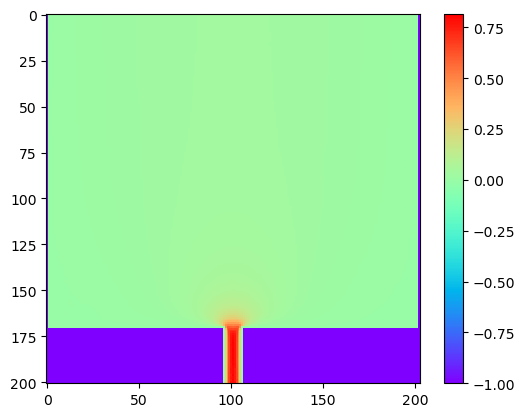

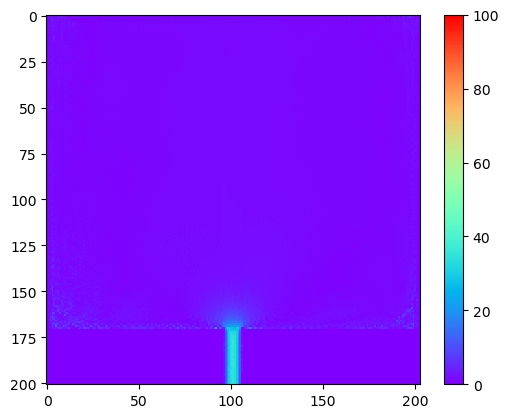

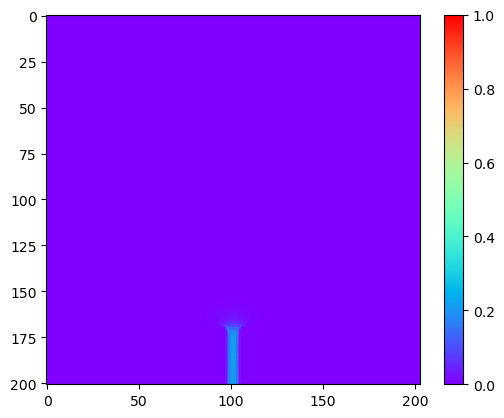

In [44]:
array2 = process_matrix(full_matrix, empty_matrix, model)
plt.imshow(array2, cmap='rainbow', interpolation='nearest')
plt.colorbar()  # Добавление цветовой шкалы
plt.savefig(f'plots/predictions/prediction.png')
plt.show()

trx = empty_matrix.copy()
trx_abs = empty_matrix.copy()
it = np.nditer(full_matrix, flags=['multi_index'], op_flags=['readwrite'], order='C')
while not it.finished:
    # Получаем текущий индекс
    i, j = it.multi_index
    
    err = (abs(array2[i,j] - full_matrix[i, j]) * 100 +0.02)/(full_matrix[i, j]+0.02)
    abs_err = abs(array2[i,j] - full_matrix[i, j])
    trx[i, j] = err
    trx_abs[i, j] = abs_err

        # Переходим к следующему элементу с учетом шага матрицы 3x3
    it.iternext()
bad_color = 'gray'
pathi = f'plots/predictions/pr_mrx.txt'
np.savetxt(pathi, array2, fmt='%f', delimiter='\t')
plt.imshow(trx, cmap='rainbow', interpolation='nearest')
plt.clim(0, 100)
plt.colorbar()  # Добавление цветовой шкалы
plt.savefig(f'plots/rel_error/error.png')
plt.show()

plt.imshow(trx_abs, cmap='rainbow', interpolation='nearest')
plt.clim(0, 1)
plt.colorbar()  # Добавление цветовой шкалы
plt.savefig(f'plots/abs_error/abs_error.png')
plt.show()
full_path = f'plots/rel_error/errors.txt'
# Сохранение массива с числами с плавающей запятой в текстовый файл
np.savetxt(full_path, trx, fmt='%f', delimiter='\t')

full_path = f'plots/abs_error/abs_errors.txt'
# Сохранение массива с числами с плавающей запятой в текстовый файл
np.savetxt(full_path, trx_abs, fmt='%f', delimiter='\t')